In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K

In [45]:
output_name = 'tau_0.07_l20_1000eps_300bs'

In [46]:
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Load  preprocess data

In [5]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [6]:
def plot_distribution(df_orig, df_syn, class_type, plot_saving_filename):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original', color='blue')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN', color='green')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')
    
    plt.title(f'Distribution of ratings among {class_type}', size= 20, fontweight='bold')
    plt.xlabel(f'{class_type}', size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.grid('on')
    #plt.legend(["Beyond-mainstream", "Mainstream"], prop={'size': 18})
    plt.legend(loc='upper right')
    plt.savefig (f"{plot_saving_filename}")
    plt.show()


In [48]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_tau_0.07_l20_1000eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


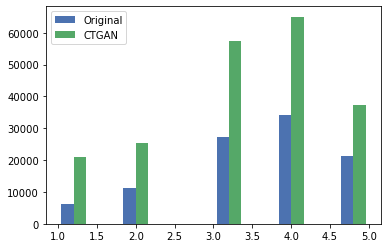

In [49]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

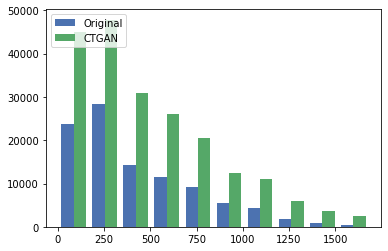

In [50]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [51]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [52]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

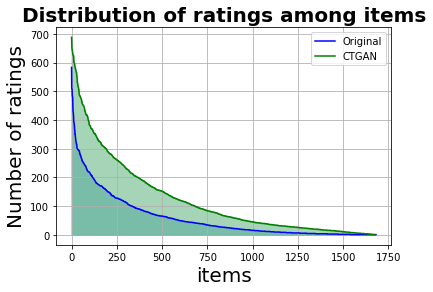

In [53]:
plot_distribution(df_items_orig, df_items_syn, 'items', item_plot_saving_filename)

### User Distribution

In [54]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [55]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

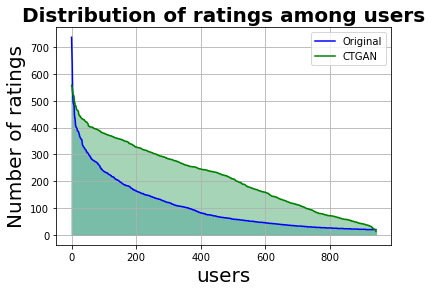

In [56]:
plot_distribution(df_users_orig, df_users_syn, 'users', user_plot_saving_filename)

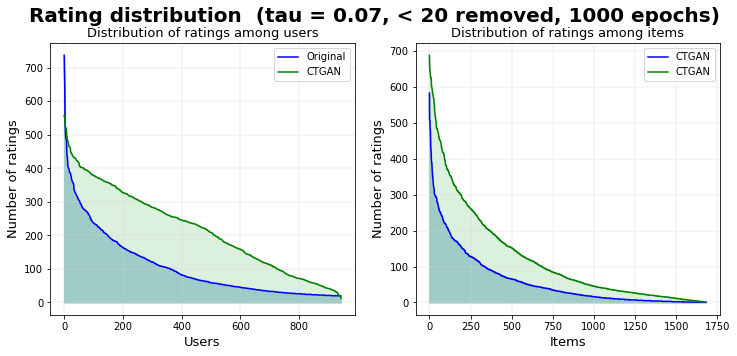

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (tau = 0.07, < 20 removed, 1000 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_1000eps_300bs.png")

In [58]:
output_name = 'tau_0.07_l20_1000eps_300bs'

In [59]:
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

## 750 epochs

In [39]:
output_name = 'tau_0.07_l20_750eps_300bs'

user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Load  preprocess data

# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_tau_0.07_l20_750eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


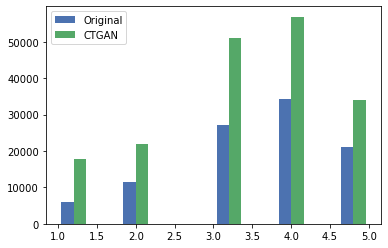

In [40]:
### Rating Distribution

# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

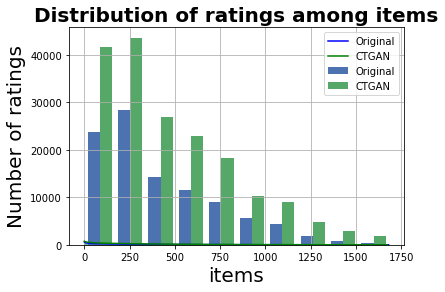

In [41]:
### Item Distribution

plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

plot_distribution(df_items_orig, df_items_syn, 'items', item_plot_saving_filename)

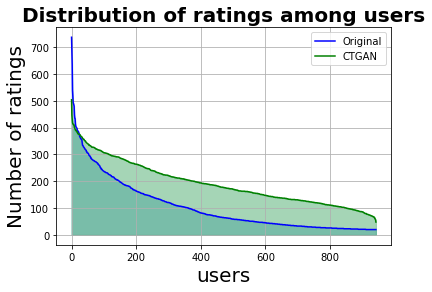

In [42]:
### User Distribution

df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

plot_distribution(df_users_orig, df_users_syn, 'users', user_plot_saving_filename)

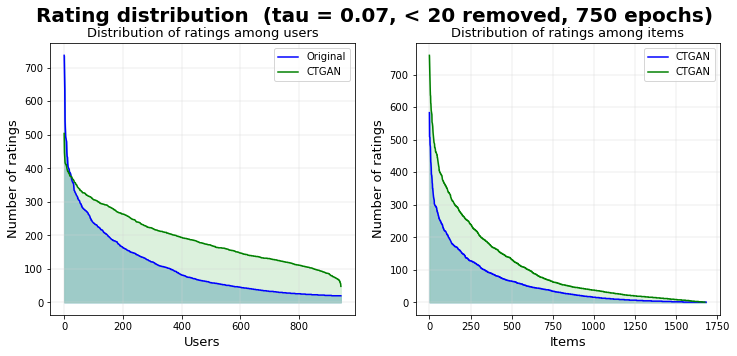

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (tau = 0.07, < 20 removed, 750 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_items_tau_0.07_l20_750eps_300bs.png")

In [44]:
output_name = 'tau_0.07_l20_750eps_300bs'

user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

In [37]:
output_name = 'tau_0.07_l20_750eps_300bs'

In [38]:
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Load  preprocess data

In [5]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [6]:
def plot_distribution(df_orig, df_syn, class_type, plot_saving_filename):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original', color='blue')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN', color='green')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')
    
    plt.title(f'Distribution of ratings among {class_type}', size= 20, fontweight='bold')
    plt.xlabel(f'{class_type}', size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.grid('on')
    #plt.legend(["Beyond-mainstream", "Mainstream"], prop={'size': 18})
    plt.legend(loc='upper right')
    plt.savefig (f"{plot_saving_filename}")
    plt.show()


In [7]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_tau_0.07_l20_500eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


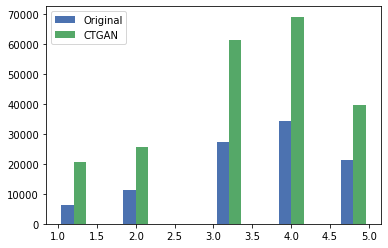

In [8]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

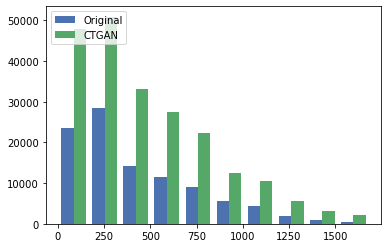

In [9]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [10]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [11]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

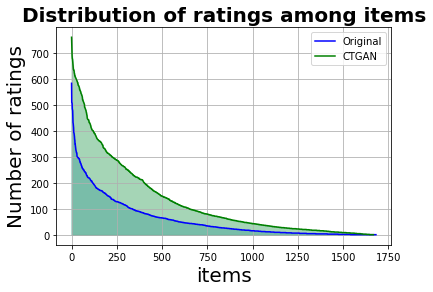

In [12]:
plot_distribution(df_items_orig, df_items_syn, 'items', item_plot_saving_filename)

### User Distribution

In [13]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [14]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

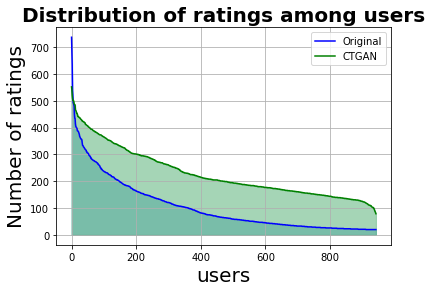

In [15]:
plot_distribution(df_users_orig, df_users_syn, 'users', user_plot_saving_filename)

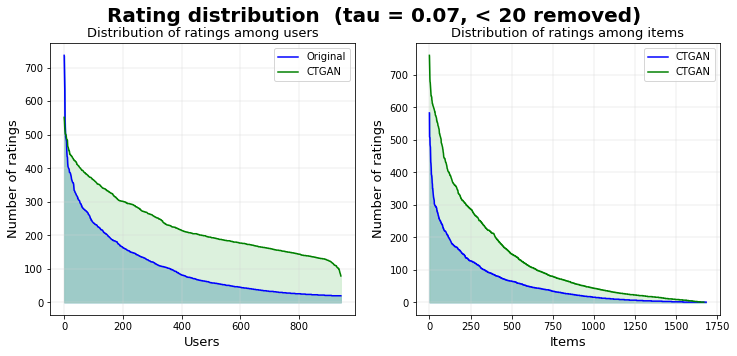

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (tau = 0.07, < 20 removed)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_items.png")

In [18]:
output_name = 'tau_0.07_l20_750eps_300bs'

In [19]:
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Load  preprocess data

In [60]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [61]:
def plot_distribution(df_orig, df_syn, class_type, plot_saving_filename):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original', color='blue')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN', color='green')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')
    
    plt.title(f'Distribution of ratings among {class_type}', size= 20, fontweight='bold')
    plt.xlabel(f'{class_type}', size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.grid('on')
    #plt.legend(["Beyond-mainstream", "Mainstream"], prop={'size': 18})
    plt.legend(loc='upper right')
    plt.savefig (f"{plot_saving_filename}")
    plt.show()


In [68]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_tau_0.07_l20_500eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

output_name = 'tau_0.07_l20_500eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


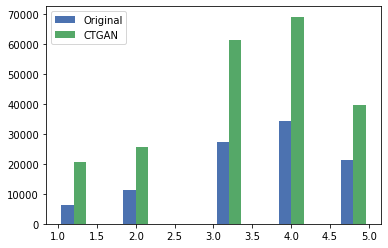

In [69]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

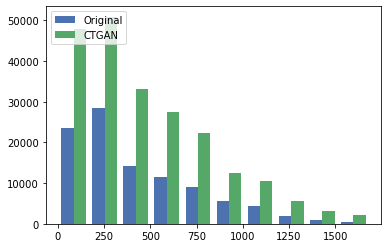

In [70]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [71]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [72]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

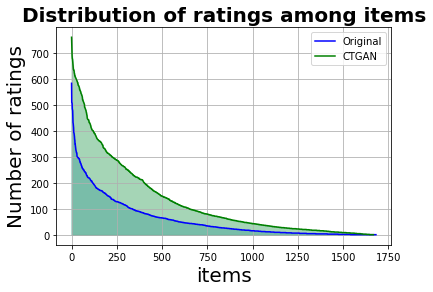

In [73]:
plot_distribution(df_items_orig, df_items_syn, 'items', item_plot_saving_filename)

### User Distribution

In [74]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [75]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

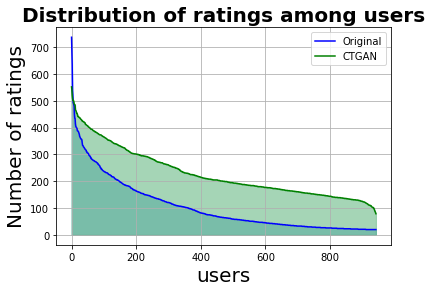

In [76]:
plot_distribution(df_users_orig, df_users_syn, 'users', user_plot_saving_filename)

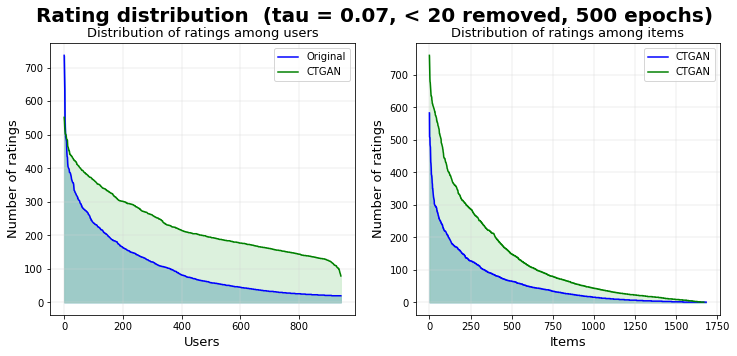

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (tau = 0.07, < 20 removed, 500 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
33ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_items_tau_0.07_l20_500eps_300bs.png")

## Visualisation all-partition 500 epochs, < 20 removed

In [19]:
output_name = 'tau_0.07_l20_500eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_all.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_all.png'

In [20]:
def transform_sparse_to_dense_data(sparse_df):
    transformed_data = []
    for uid in range(len(sparse_df)):
        for item_id in sparse_df.columns:
            rating = sparse_df.iloc[uid][item_id]
            #print(f"user: {uid} - item: {item_id} - rating: {rating}")
            if rating != 0:
                user_id = int(uid)+1
                sample = [user_id, int(item_id), int(rating)]
                transformed_data.append(sample)
            
    df = pd.DataFrame(transformed_data, columns =['user', 'item', 'rating'])
    return df

In [21]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/all_tau_0.07_l20_500eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = transform_sparse_to_dense_data(syn_data)

In [22]:
# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

      item  counts
49      50     583
257    258     509
99     100     508
180    181     507
293    294     485
...    ...     ...
1575  1576       1
1576  1577       1
1347  1348       1
1578  1579       1
1681  1682       1

[1682 rows x 2 columns]


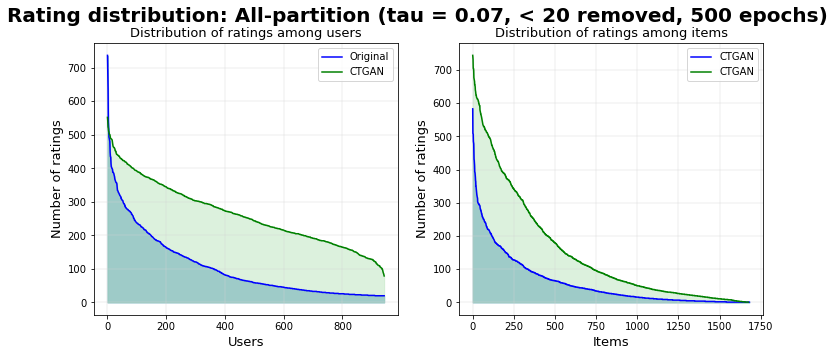

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution: All-partition (tau = 0.07, < 20 removed, 500 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_500eps_300bs_all_partition.png")

## Visualisation beyond-partition 500 epochs, < 20 removed

In [15]:
output_name = 'tau_0.07_l20_500eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_beyond.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_beyond.png'

In [16]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/beyond_tau_0.07_l20_500eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = transform_sparse_to_dense_data(syn_data)

In [17]:
# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

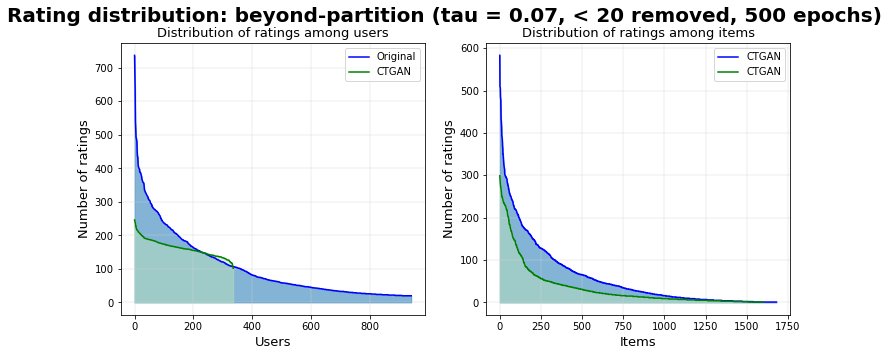

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution: beyond-partition (tau = 0.07, < 20 removed, 500 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_500eps_300bs_beyond_partition.png")

## Visualisation new sampling method (>100, <400), 500 epochs

In [23]:
output_name = 'tau_0.07_l20_500eps_300bs_new_sampling_<100_>400'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

In [25]:
# load synthetic data
# Saved as 1000, but is 500
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_middle_tail_tau_0.07_l20_1000eps_300bs.csv', sep=',', encoding='latin-1')

In [26]:
# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

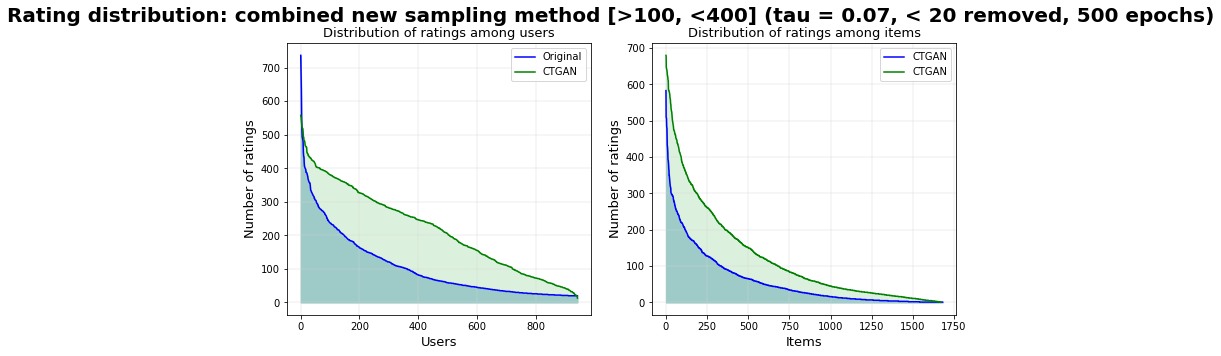

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution: combined new sampling method [>100, <400] (tau = 0.07, < 20 removed, 500 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_500eps_300bs_combined_new_sampling_m100_l400.png")

## Visualisation new sampling method (>100, <300)

In [31]:
output_name = 'tau_0.07_l20_500eps_300bs_new_sampling_>100_<300'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

# load synthetic data
# Saved as 1000, but is 500
syn_data =  pd.read_csv('output/synthetic_data/syn_dense_combined_middle_tail_tau_0.07_l20_500eps_300bs.csv', sep=',', encoding='latin-1')

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

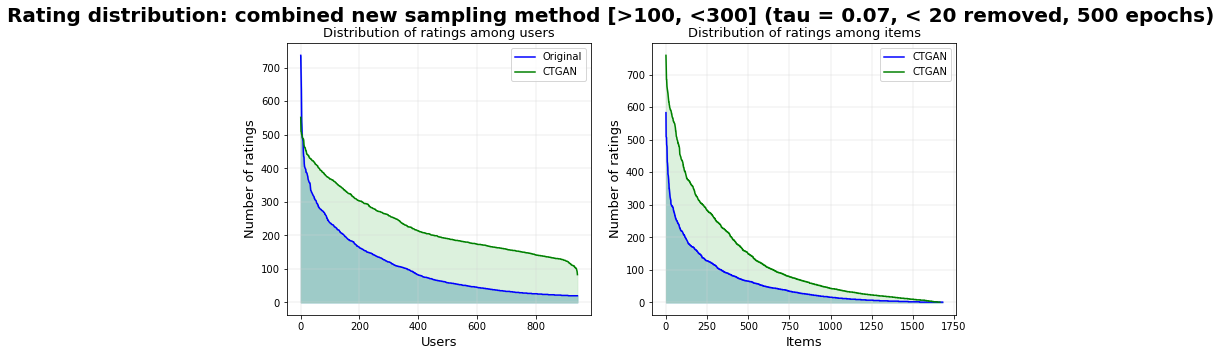

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution: combined new sampling method [>100, <300] (tau = 0.07, < 20 removed, 500 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_500eps_300bs_combined_new_sampling_m100_l300.png")

## Visualisation all-partition 750 epochs, < 20 removed

In [33]:
output_name = 'tau_0.07_l20_750eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_all.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_all.png'

# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/all_tau_0.07_l20_750eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = transform_sparse_to_dense_data(syn_data)

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

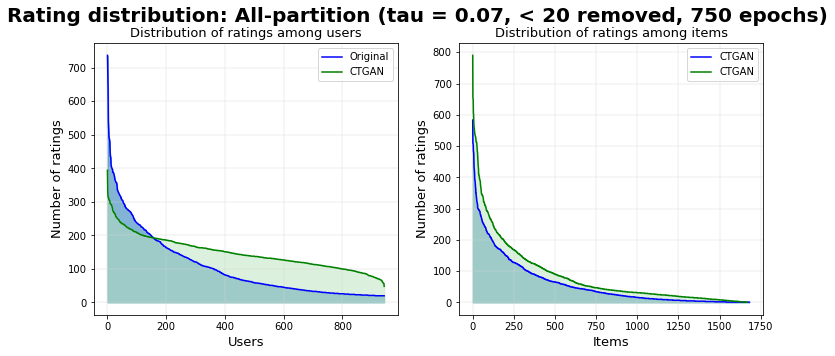

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution: All-partition (tau = 0.07, < 20 removed, 750 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainstreaminess_distribution_ratings_users_itemstau_0.07_l20_750eps_300bs_all_partition.png")

## Visualisation beyond-partition 750 epochs, < 20 removed¶

In [35]:
prefixes = ['all', 'beyond', 'combined_middle_tail', 'all_middle_tail', 'beyond_middle_tail']
prefix = prefixes[1]
epochs = 750

output_name = 'tau_0.07_l20_750eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_{prefix}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_{prefix}.png'

# load synthetic data
syn_data =  pd.read_csv(f'output/synthetic_data/beyond_tau_0.07_l20_{epochs}eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = transform_sparse_to_dense_data(syn_data)

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

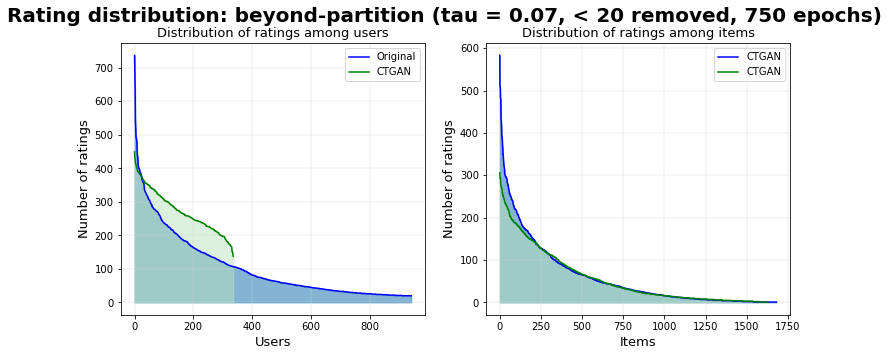

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'Rating distribution: {prefix}-partition (tau = 0.07, < 20 removed, {epochs} epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig (f"mainstreaminess_distribution_ratings_users_itemstau_0.07_l20_{epochs}eps_300bs_{prefix}_partition.png")

## Visualisation combined 750 epochs, < 20 removed¶


In [46]:
prefixes = ['all', 'beyond', 'combined_middle_tail', 'all_middle_tail', 'beyond_middle_tail']
prefix = prefixes[2]
epochs = 750
new_sampling_range = "_m100_l200"

output_name = f'tau_0.07_l20_750eps_300bs{new_sampling_range}'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_{prefix}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_{prefix}.png'

# load synthetic data
syn_data =  pd.read_csv(f'output/synthetic_data/syn_dense_{prefix}_tau_0.07_l20_{epochs}eps_300bs{new_sampling_range}.csv', sep=',', encoding='latin-1')
#syn_data = transform_sparse_to_dense_data(syn_data)

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

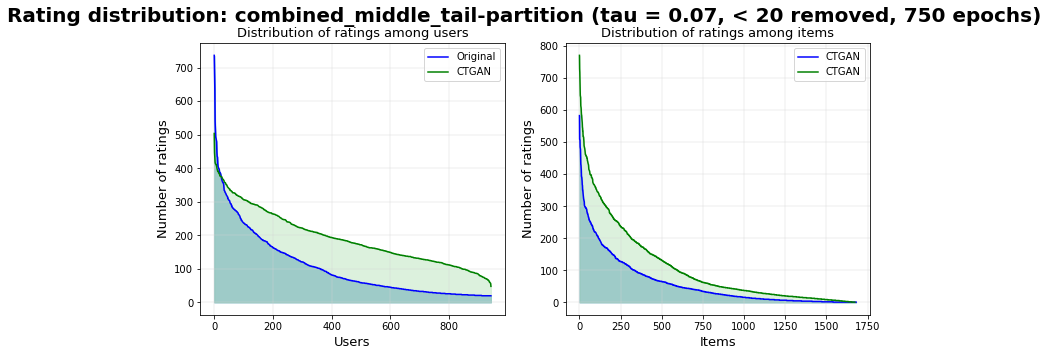

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'Rating distribution: {prefix}-partition (tau = 0.07, < 20 removed, {epochs} epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig (f"mainstreaminess_distribution_ratings_users_itemstau_0.07_l20_{epochs}eps_300bs_{prefix}_partition.png")

## Visualisation tau=0.165, new sampling method (>100, <200)¶

In [64]:
prefixes = ['all', 'beyond', 'combined_middle_tail', 'all_middle_tail', 'beyond_middle_tail']
prefix = prefixes[2]
epochs = 750
new_sampling_range = "_m100_l200"

output_name = 'tau_0.165_750eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}_{prefix}_{new_sampling_range}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}_{prefix}_{new_sampling_range}.png'

# load synthetic data
syn_data =  pd.read_csv(f'output/synthetic_data/syn_dense_{prefix}_tau_0.165_{epochs}eps_300bs_str3{new_sampling_range}.csv', sep=',', encoding='latin-1')
#syn_data = transform_sparse_to_dense_data(syn_data)

syn_data = syn_data[syn_data.rating != 0]

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)


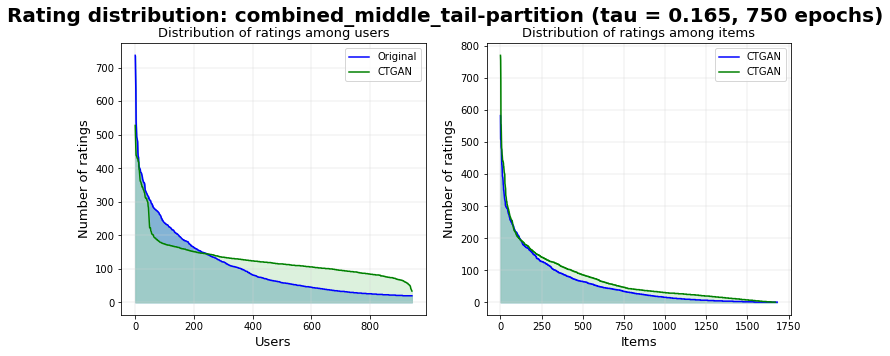

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'Rating distribution: {prefix}-partition (tau = 0.165, {epochs} epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig (f"mainstreaminess_distribution_ratings_users_itemstau_0.07_l20_{epochs}eps_300bs_{prefix}_partition.png")

## Visualisation combined 750 epochs, tau=0,165, old sampling

In [48]:
prefixes = ['all', 'beyond', 'combined_middle_tail', 'all_middle_tail', 'beyond_middle_tail']
prefix = prefixes[2]
output_name = 'tau_0.165_750eps_300bs'
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

# load synthetic data
syn_data =  pd.read_csv(f'output/synthetic_data/syn_dense_combined_tau_0.165_750eps_300bs_str3.csv', sep=',', encoding='latin-1')
#syn_data = transform_sparse_to_dense_data(syn_data)

# Group original and synthetic data by items
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

# Group original and synthetic data by users
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

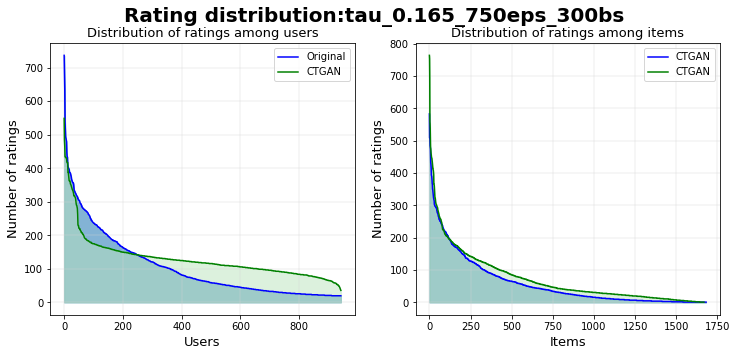

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'Rating distribution:{output_name}', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig (f"mainstreaminess_distribution_ratings_users_items_{output_name}.png")